# imdb_reviews(string data) 이용

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# with_info= True 관련된 정보도 가져온다
# 지도학습으로 감정분석 해놓은 데이터
dataset, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXLBJ4M/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXLBJ4M/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXLBJ4M/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [6]:
train_dataset, test_dataset = dataset['train'],dataset['test']

In [8]:
len(train_dataset),len(test_dataset)

(25000, 25000)

In [12]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path=PosixGPath('/tmp/tmp9viw9gxitfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInf

In [13]:
for input, label in dataset['test']:
    print(label)
    print(input)
    break

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", shape=(), 

### keras.preprocessing module 을 이용하여 tokenize 및 padding
- keras.preprocessing.text.Tokenizer
- keras.preprocessing.sequence.pad_sequnce

In [14]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

In [15]:
for sent, label in train_dataset:
    train_sentences.append(str(sent.numpy()))
    train_labels.append(label.numpy())


for sent, label in test_dataset:
    test_sentences.append(str(sent.numpy()))
    test_labels.append(label.numpy())

# 마지막 문장 확인, 레이블 1 > 긍정문
print(train_labels[-1])
print(train_sentences[-1])

print(test_labels[-1])
print(test_sentences[-1])

1
b'First of all, Riget is wonderful. Good comedy and mystery thriller at the same time. Nice combination of strange \'dogma\' style of telling the story together with good music and great actors. But unfortunately there\'s no \'the end\'. As for me it\'s unacceptable. I was thinking... how it will be possible to continue the story without Helmer and Drusse? ...and I have some idea. I think Lars should make RIGET III a little bit different. I\'m sure that 3rd part without Helmer wouldn\'t be the same. So here\'s my suggestion. Mayble little bit stupid, maybe not. I know that Lars likes to experiment. So why not to make small experiment with Riget3? I think the only solution here is to create puppet-driven animation (like for example "team America" by Trey Parker) or even computer 3d animation. I know it\'s not the same as real actors, but in principle I believe it could work... only this way it\'s possible to make actors alive again. For Riget fans this shouldn\'t be so big difference 

### train_labels, test_labels list를 numpy array로 변환

In [16]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [18]:
print(train_labels.shape)
print(test_labels.shape)

(25000,)
(25000,)


### train_sentences, test_sentesnces text를 sequence로 변환

In [19]:
vocab_size = 10000 # 10,000개로 제한

tokenizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')# <OOV> 또는 'UNK'로 많이 쓴다. 단어장에 없는 단어들을 의미
tokenizer.fit_on_texts(train_sentences)

In [ ]:
# 단어 별 인덱스 확인해보기
tokenizer.word_index

In [20]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

print(train_sequences[0])
print(test_sequences[0])

[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10]
[59, 44, 25, 109, 13, 97, 4115, 16, 742, 4370, 10, 14, 316, 5, 2, 593, 354, 16, 1864, 1212, 1, 16, 680, 7499, 5595, 1, 773, 6, 13, 1037, 1, 1, 439, 491, 1, 4, 1, 334, 3610, 20, 229, 3, 15, 5796, 3, 15, 1646, 15, 102, 5, 2, 3597, 101, 11, 1450, 1528, 12, 251, 235, 11, 216, 2, 377, 6429, 3, 62, 95, 11, 174, 105, 11, 1528, 180, 12, 251, 37, 6, 1144, 1, 682, 7, 4452, 1, 4, 1, 334, 7, 37, 8367, 377, 5, 1420, 1, 13, 30, 64, 28, 6, 874, 181, 17, 4, 1050, 5, 12, 224, 3, 83,

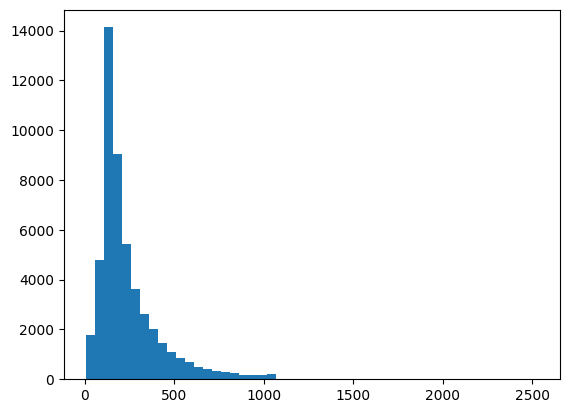

In [23]:
plt.hist([len(s) for s in train_sequences] + [len(s) for s in test_sequences],bins = 50);

In [25]:
max_length = 150

train_padded  = pad_sequences(train_sequences,maxlen=max_length, truncating = 'post', padding='post') # post : 앞부분만 자름, 패딩: 빈 공간을 채우는 것
test_padded  = pad_sequences(test_sequences,maxlen=max_length, truncating = 'post', padding='post') # post : 앞부분만 자름, 패딩: 빈 공간을 채우는 것

print(train_padded.shape)
print(test_padded.shape)
print(train_padded[0])
print(test_padded[0])

(25000, 150)
(25000, 150)
[  59   12   14   35  439  400   18  174   29    1    9   33 1378 3401
   42  496    1  197   25   88  156   19   12  211  340   29   70  248
  213    9  486   62   70   88  116   99   24 5740   12 3317  657  777
   12   18    7   35  406 8228  178 2477  426    2   92 1253  140   72
  149   55    2    1 7525   72  229   70 2962   16    1 2880    1    1
 1506 4998    3   40 3947  119 1608   17 3401   14  163   19    4 1253
  927 7986    9    4   18   13   14 4200    5  102  148 1237   11  240
  692   13   44   25  101   39   12 7232    1   39 1378    1   52  409
   11   99 1214  874  145   10    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
[  59   44   25  109   13   97 4115   16  742 4370   10   14  316    5
    2  593  354   16 1864 1212    1   16  680 7499 5595    1  773    6
   13 1037    1    1  439  491    1    4    1  334 3610   20  229    3

- sequence data 를 sentence로 reverse conversion

In [27]:
# 딕셔너리의 키와 밸류 값의 위치를 바꿔줌
reverse_word_index = dict([(value, key) for (key,value) in tokenizer.word_index.items()])

def decode_review(sequence):
    return ' '.join([tokenizer.index_word.get(i,'<pad>') for i in sequence])

print(decode_review(train_padded[0]))
print()
print(train_sentences[0])

# 단어장에 없는 단어가 OOV 처리 된 것을 알 수 있다.
# 150보다 작은 문장은 <pad>로 채움 > 길이 맞추기

b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but 

In [30]:
from keras.layers.core.embedding import Embedding
# sequntial() 후 .add로 층을 쌓아도 되고 이렇게 한번에 해도 됨
# 구글에서 많이 사용하는 방법
model = Sequential([
    Embedding(vocab_size+1,64), # Embedding(불러온 단어의 총 수, 기사 당 단어 수)
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid') # 긍정, 부정 두가지라 sigmoid, 로이터는 클래스가 46개로 나뉘었음
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714,433
Trainable params: 714,433
Non-trainable params: 0
_________________________________________________________________


In [31]:
%%time
# 모델은 25,000개의 데이터 셋 - 언어모델에서는 엄청 작은 것이다. 이미지에서는 큰 데이터셋
num_epochs = 30
history = model.fit(train_padded, train_labels, epochs = num_epochs, batch_size = 128, validation_data=(test_padded,test_labels),verbose=1)

Epoch 1/30
196/196 [==============================] - 70s 295ms/step - loss: 0.4666 - accuracy: 0.7622 - val_loss: 0.3674 - val_accuracy: 0.8398
Epoch 2/30
196/196 [==============================] - 30s 153ms/step - loss: 0.2702 - accuracy: 0.8946 - val_loss: 0.3758 - val_accuracy: 0.8337
Epoch 3/30
196/196 [==============================] - 22s 111ms/step - loss: 0.2074 - accuracy: 0.9226 - val_loss: 0.4412 - val_accuracy: 0.8290
Epoch 4/30
196/196 [==============================] - 10s 50ms/step - loss: 0.1659 - accuracy: 0.9408 - val_loss: 0.4457 - val_accuracy: 0.8257
Epoch 5/30
196/196 [==============================] - 9s 44ms/step - loss: 0.1297 - accuracy: 0.9549 - val_loss: 0.5576 - val_accuracy: 0.8121
Epoch 6/30
196/196 [==============================] - 8s 39ms/step - loss: 0.0951 - accuracy: 0.9673 - val_loss: 0.5205 - val_accuracy: 0.8012
Epoch 7/30
196/196 [==============================] - 10s 51ms/step - loss: 0.0799 - accuracy: 0.9732 - val_loss: 0.7247 - val_accuracy

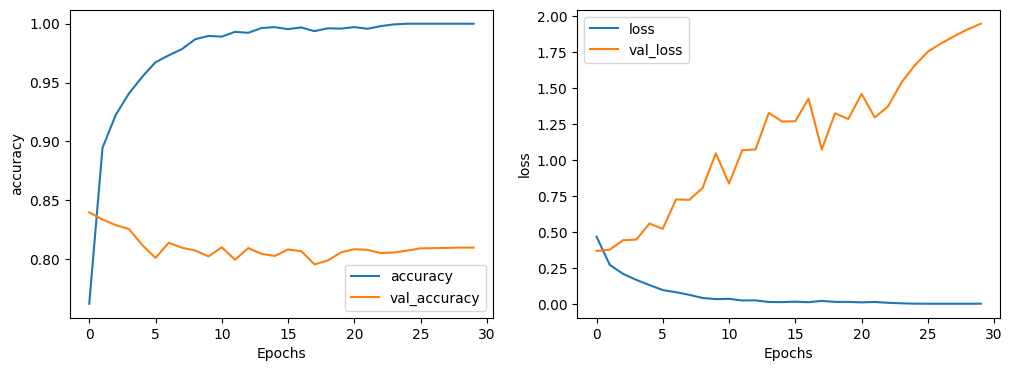

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('Epochs')
ax1.set_ylabel('accuracy')
ax1.legend(['accuracy','val_accuracy'])
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('loss')
ax2.legend(['loss','val_loss'])
plt.show()
# 전형적인 오버피팅, 언어 모델에서는 25000개가 넘으면 수업하기 어려움

In [35]:
sample_text = ['The movie was terrible. I would not recommencd the movie']
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating = 'post', padding='post')
sample_padded

array([[  2,  18,  14, 400,  11,  64,  24,   1,   2,  18,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [36]:
model.predict([sample_padded])

1/1 [==============================] - 1s 944ms/step


array([[0.00453431]], dtype=float32)